# EXPLORATORY DATA ANALYSIS (EDA)

### Bussiness Questions
#### What can we learn about different hosts and areas?
#### What can we learn from predictions? (ex: locations, prices, reviews, etc)
#### Which hosts are the busiest and why?
#### Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\MSc Project\Myproject\Proj_ideas\Airbnb_Analysis\data\listingss.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN


In [4]:
df.shape # There are total 18 columns and 69351 observations

(69351, 18)

Text(0.5, 1.0, 'Heatmap for Outliers')

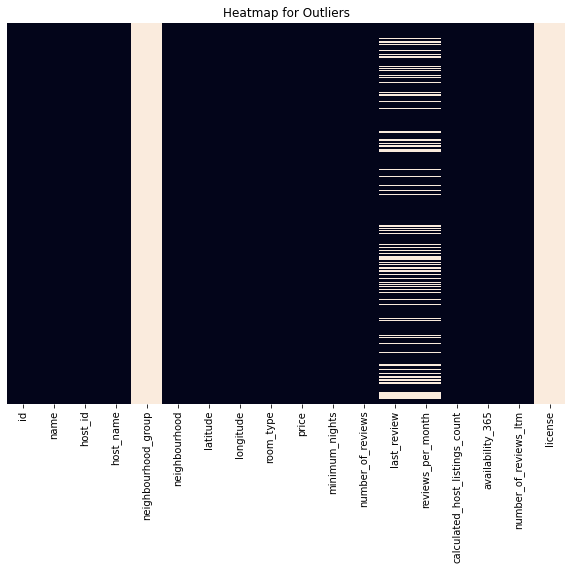

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)
plt.title("Heatmap for Outliers")

In [6]:
round((df.isnull().sum()/df.shape[0])*100,2)

id                                  0.00
name                                0.03
host_id                             0.00
host_name                           0.01
neighbourhood_group               100.00
neighbourhood                       0.00
latitude                            0.00
longitude                           0.00
room_type                           0.00
price                               0.00
minimum_nights                      0.00
number_of_reviews                   0.00
last_review                        24.20
reviews_per_month                  24.20
calculated_host_listings_count      0.00
availability_365                    0.00
number_of_reviews_ltm               0.00
license                           100.00
dtype: float64

#### "neighbourhood_group" and "license" are completely fillled with null values. So, we can remove them.               

In [7]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.935100e+04,6.935100e+04,0.0,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,52571.000000,69351.000000,69351.000000,69351.000000,0.0
mean,1.373703e+17,1.242124e+08,NaN,51.509544,-0.128489,177.208822,5.997505,17.537051,0.882593,11.987498,108.520266,4.734438,NaN
std,2.651479e+17,1.377104e+08,NaN,0.049182,0.100957,412.823024,25.709514,40.410763,1.274510,37.148839,132.821088,12.032502,NaN
min,1.391300e+04,4.775000e+03,NaN,51.272480,-0.523600,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.810090e+07,1.870718e+07,NaN,51.483140,-0.189520,55.000000,1.000000,1.000000,0.120000,1.000000,0.000000,0.000000,NaN
50%,3.395467e+07,6.010350e+07,NaN,51.513600,-0.126200,100.000000,2.000000,4.000000,0.430000,1.000000,32.000000,0.000000,NaN
75%,5.265645e+07,1.960405e+08,NaN,51.539710,-0.068550,180.000000,4.000000,16.000000,1.080000,4.000000,228.000000,5.000000,NaN
max,7.123951e+17,4.788540e+08,NaN,51.708930,0.305150,25000.000000,1125.000000,1141.000000,51.330000,285.000000,365.000000,660.000000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69330 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69346 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   69351 non-null  object 
 6   latitude                        69351 non-null  float64
 7   longitude                       69351 non-null  float64
 8   room_type                       69351 non-null  object 
 9   price                           69351 non-null  int64  
 10  minimum_nights                  69351 non-null  int64  
 11  number_of_reviews               69351 non-null  int64  
 12  last_review                     

In [9]:
df["price_per_night"] = round(df["price"]/df["minimum_nights"],2)

Text(0.5, 1.0, 'Top 10 highest traffic BY location')

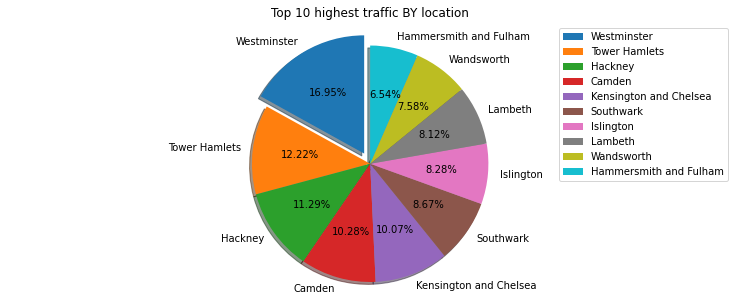

In [10]:
values = df.neighbourhood.value_counts()[0:10].values
labels = df.neighbourhood.value_counts()[0:10].index
explode = [0.1,0,0,0,0,0,0,0,0,0]
plt.figure(figsize=(13,5))
plt.pie(values,labels=labels,shadow=True,autopct="%.2f%%",explode=explode,startangle=90,radius=1)
plt.axis("equal")
plt.legend()
plt.title("Top 10 highest traffic BY location")

#### From the above graph, we can understand that westminister has highest traffic, while tower hamlets,hackney to be the places with next highest traffic.

Text(0.5, 1.0, 'Top 10 lowest traffic BY location')

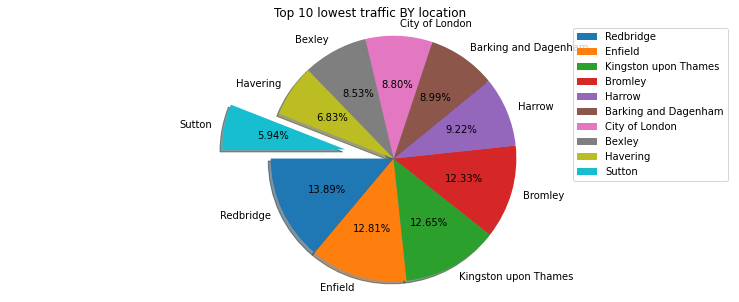

In [11]:
values = df.neighbourhood.value_counts().tail(10).values
labels = df.neighbourhood.value_counts().tail(10).index
explode = [0,0,0,0,0,0,0,0,0,0.4]
plt.figure(figsize=(13,5))
plt.pie(values,labels=labels,shadow=True,autopct="%.2f%%",explode=explode,startangle=180,radius=1)
plt.axis("equal")
plt.legend()
plt.title("Top 10 lowest traffic BY location")

#### From the above graph, Sutton is place with the lowest traffic place.

In [12]:
from datetime import datetime
df["last_review"] = pd.to_datetime(df["last_review"])

In [13]:
df["last_review_year"] = pd.DatetimeIndex(df["last_review"]).year
df["last_review_month"] = pd.DatetimeIndex(df["last_review"]).month
df["last_review_day"] = pd.DatetimeIndex(df["last_review"]).day

In [14]:
df_yearwise_reviews = pd.DataFrame(df["last_review_year"].value_counts()).reset_index().rename(columns = {"index":"Year"}).sort_values(by="Year",ascending=True).set_index("Year")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Review count by year')

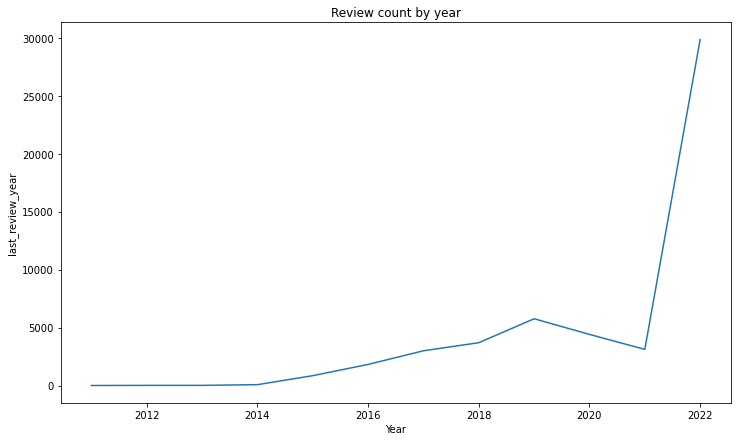

In [15]:
plt.figure(figsize=(12,7))
sns.lineplot(df_yearwise_reviews.index,df_yearwise_reviews["last_review_year"])
plt.title("Review count by year")

### There is huge hike in no of booking for stays from mid of 2020.

In [16]:
from calendar import month_name
month_lookup = list(month_name)

In [17]:
month_lookup.pop(0)

''

In [18]:
months = pd.DataFrame(month_lookup,columns = ["Month"])

In [19]:
months

,Month
0,January
1,February
2,March
3,April
4,May
5,June
6,July
7,August
8,September
9,October


In [25]:
df["Month_name"] = pd.to_datetime(df["last_review_month"],format="%m").dt.month_name()

In [26]:
months_with_count = pd.DataFrame(df["Month_name"].value_counts()).reset_index().rename(columns={"index":"Month"})

In [27]:
months_with_count

,Month,Month_name
0,August,16864
1,July,7762
2,September,7731
3,June,3407
4,January,2793
5,March,2375
6,May,2199
7,December,2143
8,October,2041
9,April,1959


In [28]:
final_reviewcount_month = pd.merge(months,months_with_count,how="left",on="Month")

In [35]:
final_reviewcount_month.rename(columns={"Month_count":"last_review_month"},inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Review count by month')

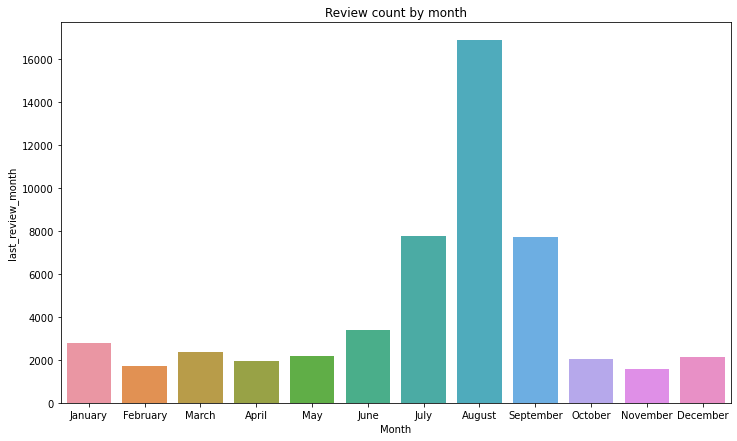

In [36]:
plt.figure(figsize=(12,7))
sns.barplot(final_reviewcount_month["Month"],final_reviewcount_month["last_review_month"])
plt.title("Review count by month")

In [37]:
bookingBY_month_year = pd.DataFrame(df.groupby(["Month_name","last_review_year"])["last_review_month"].size()).reset_index()

In [38]:
bookingBY_month_year

,Month_name,last_review_year,last_review_month
0,April,2014.0,2
1,April,2015.0,21
2,April,2016.0,122
3,April,2017.0,191
4,April,2018.0,227
...,...,...,...
116,September,2018.0,370
117,September,2019.0,571
118,September,2020.0,273
119,September,2021.0,421


In [39]:
df.drop(["id","host_id","neighbourhood_group","license","last_review"],axis=1,inplace=True)

In [40]:
df.isnull().sum()

name                                 21
host_name                             5
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 16780
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
price_per_night                       0
last_review_year                  16780
last_review_month                 16780
last_review_day                   16780
Month_name                        16780
dtype: int64

In [41]:
df.groupby("neighbourhood")["minimum_nights"].median().sort_values(ascending=False)

neighbourhood
Westminster               3.0
City of London            3.0
Hammersmith and Fulham    3.0
Hackney                   3.0
Kensington and Chelsea    3.0
Sutton                    2.0
Tower Hamlets             2.0
Southwark                 2.0
Richmond upon Thames      2.0
Islington                 2.0
Newham                    2.0
Waltham Forest            2.0
Wandsworth                2.0
Merton                    2.0
Lewisham                  2.0
Lambeth                   2.0
Kingston upon Thames      2.0
Redbridge                 2.0
Barking and Dagenham      2.0
Hounslow                  2.0
Barnet                    2.0
Havering                  2.0
Harrow                    2.0
Haringey                  2.0
Greenwich                 2.0
Enfield                   2.0
Ealing                    2.0
Croydon                   2.0
Camden                    2.0
Bromley                   2.0
Brent                     2.0
Bexley                    2.0
Hillingdon                

### Westminster,City of London,Hammersmith and Fulham,Hackney,Kensington and Chelsea are the cities where the people staying with 3 nights on an avg.

Text(0.5, 0, 'price per night')

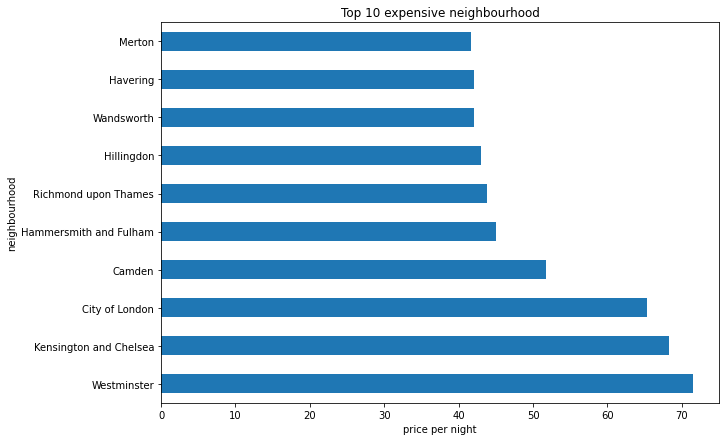

In [42]:
plt.figure(figsize=(10,7))
df.groupby("neighbourhood")["price_per_night"].median().sort_values(ascending=False)[0:10].plot(kind="barh")
plt.title("Top 10 expensive neighbourhood")
plt.xlabel("price per night")

Text(0.5, 0, 'price per night')

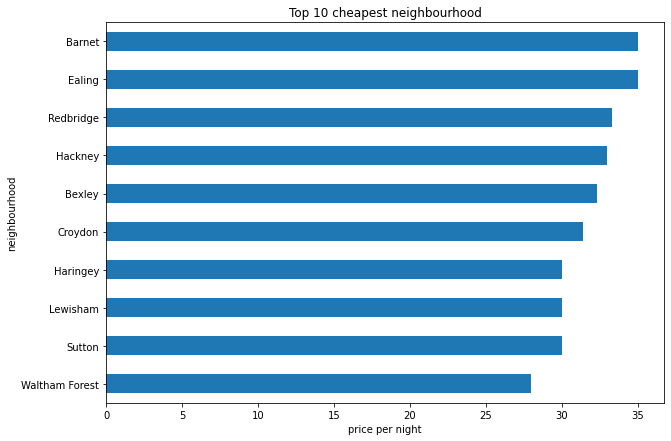

In [43]:
plt.figure(figsize=(10,7))
df.groupby("neighbourhood")["price_per_night"].median().sort_values(ascending=True)[0:10].plot(kind="barh")
plt.title("Top 10 cheapest neighbourhood")
plt.xlabel("price per night")

#### Top 3 cheapest neighbourhoods:
#### 1) Wlatham Forest
#### 2) Sutton
#### 3) Lewisham

### Lets analyse why prices are high in top 3 expensive neighbours 
#### 1) Westminster
#### 2) Kensington and Chelsea
#### 3) City of London

In [44]:
df_cityoflondon = df[df["neighbourhood"]=="City of London"]
df_Kensington = df[df["neighbourhood"]=="Kensington"]
df_Westminster = df[df["neighbourhood"]=="Westminster"]

Text(0.5, 1.0, 'Distribution of price/night in Westminster')

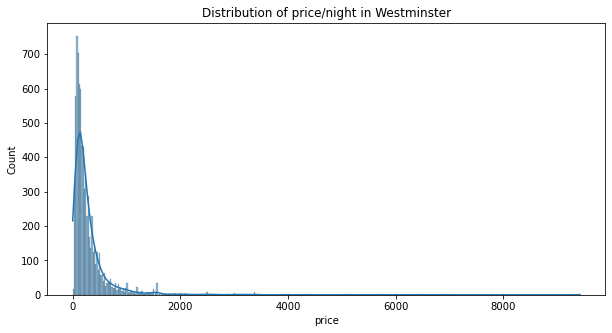

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(df_Westminster["price"],kde=True)
plt.title("Distribution of price/night in Westminster")

#### From the above distribution, we can understand majority of the hosts charging standard price, but fewer hosts charging too much.

### Lets find out who are they?


In [46]:
print("25% tile of the data : ",df_Westminster["price_per_night"].quantile(0.25))
print("50% tile of the data : ",df_Westminster["price_per_night"].quantile(0.50))
print("75% tile of the data : ",df_Westminster["price_per_night"].quantile(0.75))
print("80% tile of the data : ",df_Westminster["price_per_night"].quantile(0.80)) 
print("90% tile of the data : ",df_Westminster["price_per_night"].quantile(0.90))      

25% tile of the data :  33.135000000000005
50% tile of the data :  71.43
75% tile of the data :  148.0
80% tile of the data :  177.0
90% tile of the data :  288.9000000000001


### 50% of the prices are under or equals to 71.00
### 75% of the prices are under or equals to 178.00
### 90% of the prices are under or equals to 288.00

### So, only 10% of the prices falling above 288.

Text(0.5, 1.0, 'Top 10 busiest host avg price/night')

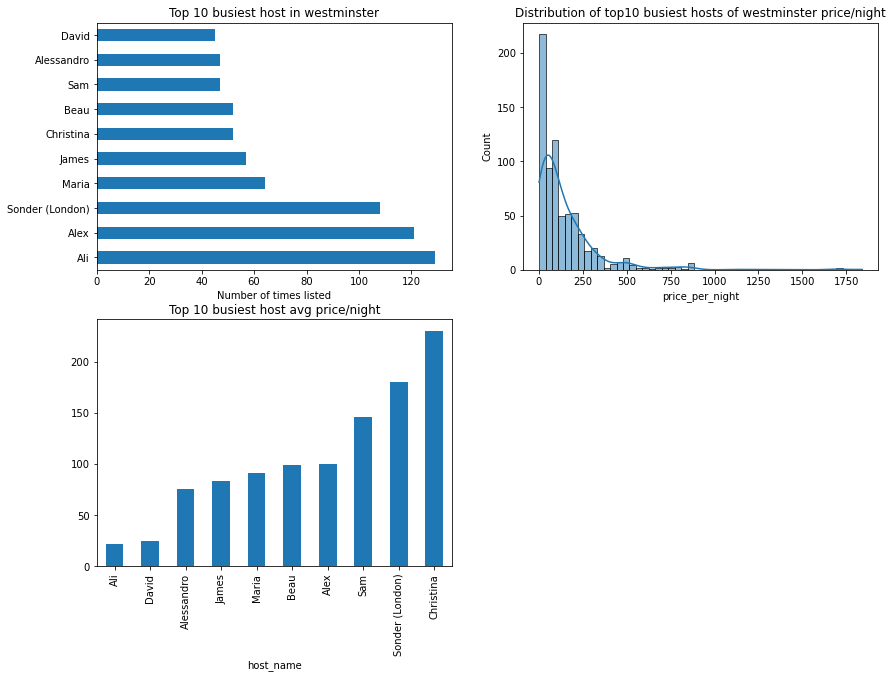

In [91]:
#created a variable with top10_bussiest hosts data in westminster
top10_busiesthostsnames_west = df_Westminster[df_Westminster["host_name"].isin(df_Westminster["host_name"].value_counts().head(10).index.to_list())]

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
top10_busiest_hosts_westminister = df_Westminster["host_name"].value_counts().head(10)
df_Westminster["host_name"].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 busiest host in westminster")
plt.xlabel("Number of times listed")

plt.subplot(2,2,2)
sns.histplot(top10_busiesthostsnames_west["price_per_night"],kde=True)
plt.title("Distribution of top10 busiest hosts of westminster price/night")


plt.subplot(2,2,3)
top10_busiesthostsnames_west.groupby("host_name")["price_per_night"].median().sort_values(ascending=True).plot(kind="bar")
ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom'
plt.title("Top 10 busiest host avg price/night")

In [100]:
price_by_histyear_westminster = pd.DataFrame(top10_busiesthostsnames_west.groupby(["host_name","last_review_year"])["price_per_night"].median()).reset_index().sort_values(by=["host_name","price_per_night"],ascending=True)


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='host_name', ylabel='host_count'>

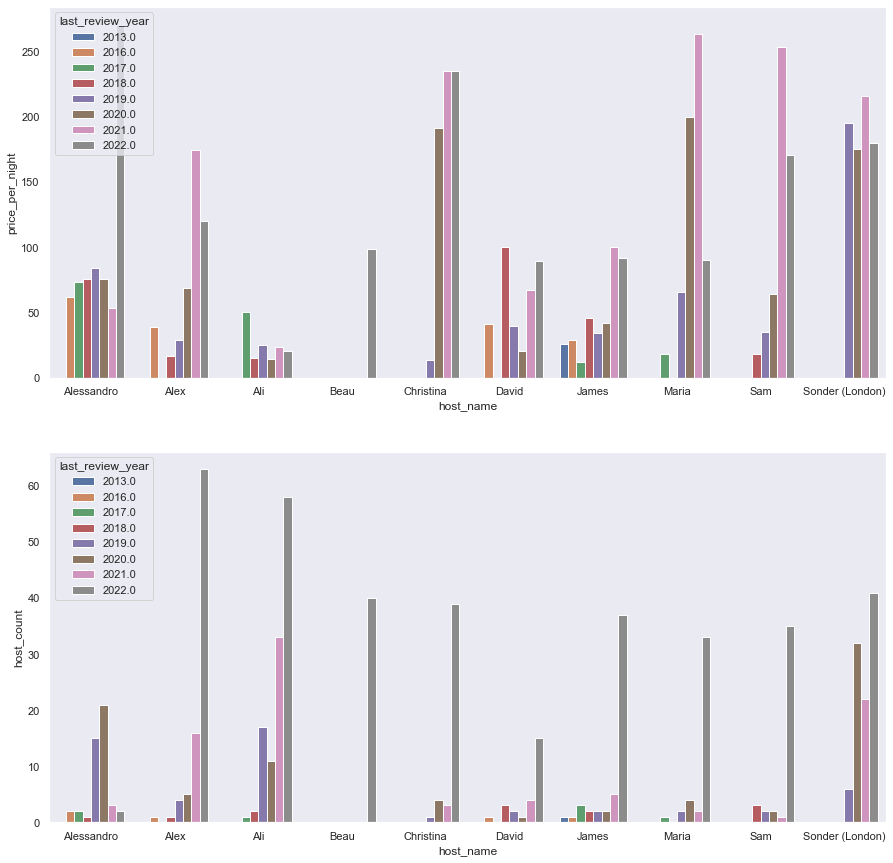

In [155]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.barplot(price_by_histyear_westminster["host_name"],price_by_histyear_westminster["price_per_night"],hue=price_by_histyear_westminster["last_review_year"])

plt.subplot(2,1,2)
sns.barplot(westmin_top10_host_countBYyear["host_name"],westmin_top10_host_countBYyear["host_count"],hue=westmin_top10_host_countBYyear["last_review_year"])

#### Some busiest hosts in westminster have increased prices in 2021 and decreased prices in 2022 (eg: Alex,Maria,Sam,Sonder)
#### Alessandro has put up the price to high in 2022 compared to 2021.
#### Ali's price is very reasonable and no significant change in price.
#### Beau has listed only in 2022 in westminster, could be new host.

In [147]:
westmin_top10_host_countBYyear = pd.DataFrame(df_Westminster[df_Westminster["host_name"].isin(top10_busiest_hosts_westminister.index.to_list())].groupby(["host_name","last_review_year"])["host_name"].count()).rename(columns={"host_name":"host_count"}).reset_index()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='host_name', ylabel='host_count'>

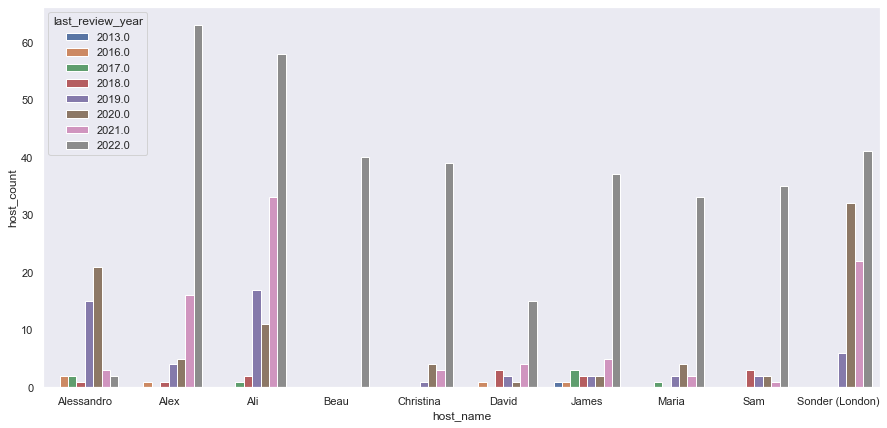

In [151]:
plt.figure(figsize=(15,7))
sns.barplot(westmin_top10_host_countBYyear["host_name"],westmin_top10_host_countBYyear["host_count"],hue=westmin_top10_host_countBYyear["last_review_year"])

In [50]:
print("min price/night : ",top10_busiesthostsnames_west["price_per_night"].min()) 
print("25% tile of the data : ",top10_busiesthostsnames_west["price_per_night"].quantile(0.25))
print("50% tile of the data : ",top10_busiesthostsnames_west["price_per_night"].quantile(0.50))
print("75% tile of the data : ",top10_busiesthostsnames_west["price_per_night"].quantile(0.75))
print("80% tile of the data : ",top10_busiesthostsnames_west["price_per_night"].quantile(0.80)) 
print("90% tile of the data : ",top10_busiesthostsnames_west["price_per_night"].quantile(0.90))    
print("max price/night : ",top10_busiesthostsnames_west["price_per_night"].max()) 

min price/night :  0.67
25% tile of the data :  26.7275
50% tile of the data :  89.0
75% tile of the data :  193.5625
80% tile of the data :  219.7340000000001
90% tile of the data :  320.45
max price/night :  1839.5


In [61]:
top10_busiesthostsnames_west.head()

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_per_night,last_review_year,last_review_month,last_review_day,Month_name
600,Massive Superb flat in Notting Hill,Alex,Westminster,51.51612,-0.19557,Entire home/apt,300,3,63,0.63,2,14,8,100.0,2022.0,8.0,18.0,August
904,Double Studio in Victoria 1A,Alessandro,Westminster,51.48982,-0.14120,Private room,73,1,158,1.32,44,0,0,73.0,2017.0,9.0,17.0,September
940,Stunning Studio in Victoria 3A,Alessandro,Westminster,51.49016,-0.13909,Entire home/apt,106,1,223,1.84,44,0,0,106.0,2020.0,3.0,11.0,March
948,Double studio in Victoria 4A,Alessandro,Westminster,51.49099,-0.14094,Private room,73,1,249,2.06,44,0,0,73.0,2020.0,3.0,10.0,March
975,Brand new studio in Victoria 8A,Alessandro,Westminster,51.49113,-0.14117,Entire home/apt,76,1,332,2.74,44,0,0,76.0,2020.0,3.0,19.0,March


<AxesSubplot:ylabel='neighbourhood'>

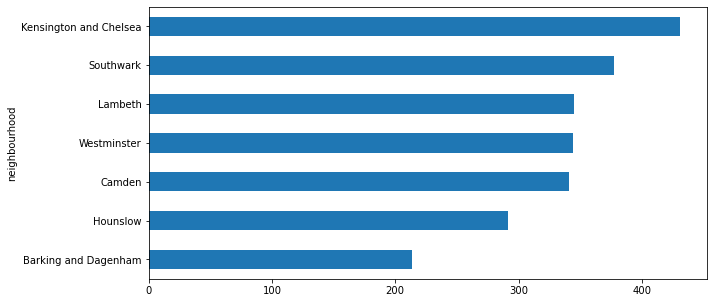

In [51]:
#df_Westminster[df_Westminster["host_name"]=="Stayo"].shape
plt.figure(figsize=(10,5))
df[df["host_name"]=="Stayo"][["neighbourhood","price_per_night"]].groupby("neighbourhood")["price_per_night"].median().sort_values(ascending=True).plot(kind="barh")

In [52]:
df_Westminster[df_Westminster["price_per_night"]>320].head()

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_per_night,last_review_year,last_review_month,last_review_day,Month_name
324,Stunning Home in Central London,Arvind,Westminster,51.53108,-0.18058,Entire home/apt,500,1,14,0.13,1,365,1,500.0,2022.0,5.0,8.0,May
2413,2 bedroom Mayfair flat on prestigious Mount st...,Alca-Pass The Keys,Westminster,51.50923,-0.15232,Entire home/apt,782,2,15,0.20,1,71,13,391.0,2022.0,8.0,14.0,August
3745,3 bedroom flat in St Johns wood,Yakir,Westminster,51.53057,-0.17869,Entire home/apt,350,1,0,NaN,1,0,0,350.0,NaN,NaN,NaN,NaN
4279,★ Spacious Apartment - Covent Garden ★,Ian,Westminster,51.50694,-0.12365,Entire home/apt,450,1,56,0.62,8,257,8,450.0,2022.0,8.0,3.0,August
5625,Lovely 2 bed at Garrick Street - CG10,Stayo,Westminster,51.51256,-0.12637,Entire home/apt,346,1,93,1.09,66,91,25,346.0,2022.0,8.0,19.0,August


In [53]:
len(df_Westminster[df_Westminster["price_per_night"]>320]["host_name"].unique())

195

In [54]:
len(df_Westminster["host_name"].unique())

2173

In [55]:
df_Westminster.groupby("host_name")["price_per_night"].median().sort_values(ascending=False).head(10)

host_name
COMO Metropolitan London    9428.00
Azimali                     3059.00
Seran                       2500.00
Oya                         2500.00
Pritam                      1735.00
Bienvenido                  1700.00
Caroline & Kai              1685.50
Mohammed                    1500.00
Wilson                      1142.00
Veeve                       1006.75
Name: price_per_night, dtype: float64